In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.layers import Input,Dense,Flatten,MaxPool1D,Activation,LeakyReLU,LSTM,BatchNormalization,Dropout, Conv1D,Lambda
from keras.models import Model
import pandas as pd
import keras.backend as K
import h5py
import model_architectures as ma
import utils

In [2]:
models_dir = 'C:/Users/91912/projects/models/baseline_lstm/'
feat_file='C:/Users/91912/project_features/amp_phs_features.h5'
fid=h5py.File(feat_file,'r');
x_tr=fid['x_tr']
y_tr=fid['y_tr'] 
snr_tr = np.array(fid['snr_tr'])
x_ts=fid['x_ts']
y_ts=fid['y_ts']
snr_ts = np.array(fid['snr_ts'])

In [3]:
m1 = ma.baseline_lstm()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 2)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 128, 2)            8         
_________________________________________________________________
lstm_1 (LSTM)                (None, 128, 128)          67072     
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 11)                1419      
Total params: 200,083
Trainable params: 200,079
Non-trainable params: 4
_____________________________________________________

In [4]:
checkpoint = keras.callbacks.ModelCheckpoint(models_dir+ "model_epoch-{epoch:02d}_val_acc-{val_accuracy:.2f}.h5", monitor='val_accuracy', verbose=2, save_best_only=False, save_weights_only=False, mode='auto', period=1)

In [5]:
history = m1.fit(x=x_tr,
       y=y_tr,
       validation_data=[x_ts,y_ts],
       batch_size=400,
       epochs=60,
       shuffle='batch',
       callbacks = [checkpoint],
       verbose=2)


Train on 198000 samples, validate on 22000 samples
Epoch 1/60
 - 87s - loss: 2.0818 - accuracy: 0.2191 - val_loss: 2.0308 - val_accuracy: 0.2394

Epoch 00001: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-01_val_acc-0.24.h5
Epoch 2/60
 - 76s - loss: 1.8406 - accuracy: 0.3051 - val_loss: 1.5892 - val_accuracy: 0.4038

Epoch 00002: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-02_val_acc-0.40.h5
Epoch 3/60
 - 77s - loss: 1.6322 - accuracy: 0.3895 - val_loss: 1.4957 - val_accuracy: 0.4311

Epoch 00003: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-03_val_acc-0.43.h5
Epoch 4/60
 - 75s - loss: 1.4549 - accuracy: 0.4468 - val_loss: 1.4310 - val_accuracy: 0.4547

Epoch 00004: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-04_val_acc-0.45.h5
Epoch 5/60
 - 78s - loss: 1.4198 - accuracy: 0.4635 - val_loss: 1.3952 - val_accuracy: 0.4724

Epoch 00005: saving model to C:/Users/91912/projects/m

 - 74s - loss: 1.1259 - accuracy: 0.5993 - val_loss: 1.2179 - val_accuracy: 0.5716

Epoch 00042: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-42_val_acc-0.57.h5
Epoch 43/60
 - 75s - loss: 1.1221 - accuracy: 0.6008 - val_loss: 1.2232 - val_accuracy: 0.5701

Epoch 00043: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-43_val_acc-0.57.h5
Epoch 44/60
 - 77s - loss: 1.1175 - accuracy: 0.6019 - val_loss: 1.2167 - val_accuracy: 0.5704

Epoch 00044: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-44_val_acc-0.57.h5
Epoch 45/60
 - 76s - loss: 1.1170 - accuracy: 0.6021 - val_loss: 1.2298 - val_accuracy: 0.5723

Epoch 00045: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-45_val_acc-0.57.h5
Epoch 46/60
 - 76s - loss: 1.1080 - accuracy: 0.6058 - val_loss: 1.2264 - val_accuracy: 0.5702

Epoch 00046: saving model to C:/Users/91912/projects/models/baseline_lstm/model_epoch-46_val_acc-0.57.h5
Epoch 4

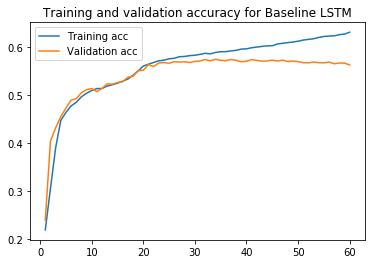

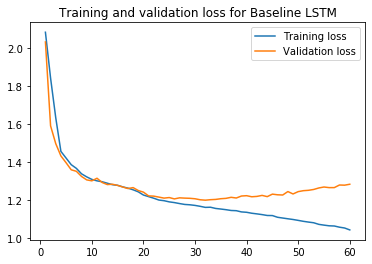

In [7]:
acc_base_lstm = history.history['accuracy']
val_acc_base_lstm = history.history['val_accuracy']
loss_base_lstm = history.history['loss']
val_loss_base_lstm = history.history['val_loss']
epochs = range(1, len(acc_base_lstm) + 1)
plt.plot(epochs, acc_base_lstm, label='Training acc')
plt.plot(epochs, val_acc_base_lstm, label='Validation acc')
plt.title('Training and validation accuracy for Baseline LSTM')
plt.legend()
plt.figure()
plt.plot(epochs, loss_base_lstm, label='Training loss')
plt.plot(epochs, val_loss_base_lstm, label='Validation loss')
plt.title('Training and validation loss for Baseline LSTM')
plt.legend()
plt.show()